In [2]:
import numpy as np

In [3]:
data = np.load("dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz")

In [4]:
data.files

['metadata', 'imgs', 'latents_classes', 'latents_values']

In [5]:
data[data.files[2]]

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  2],
       ...,
       [ 0,  2,  5, 39, 31, 29],
       [ 0,  2,  5, 39, 31, 30],
       [ 0,  2,  5, 39, 31, 31]], dtype=int64)

In [6]:
data[data.files[3]][400000]

array([1.        , 2.        , 0.8       , 4.83321947, 0.64516129,
       0.        ])

In [7]:
imgs = data[data.files[1]]

In [8]:
atts = data[data.files[3]]

In [9]:
# meta = data[data.files[0]]

In [57]:
imgs.shape

(737280, 64, 64)

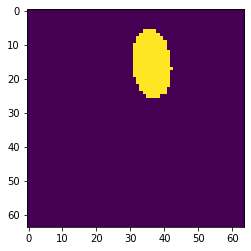

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(imgs[400000,:,:])
plt.show()



In [12]:
img_0=imgs[atts[:,1]==1]

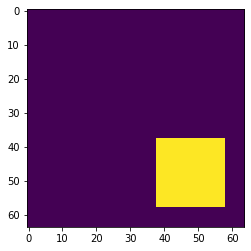

In [15]:
img_0.shape
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(img_0[-1,:,:])
plt.show()

In [47]:
attDist = atts[atts[:,1]==1]
print(attDist.shape)
print(np.min(attDist, axis=0))
print(np.max(attDist, axis=0))
print(attDist[0,:])

(245760, 6)
[1.  1.  0.5 0.  0.  0. ]
[1.         1.         1.         6.28318531 1.         1.        ]
[1.  1.  0.5 0.  0.  0. ]


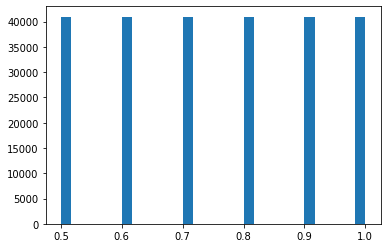

In [84]:
plt.hist(attDist[:,2], bins=30)
plt.show()

In [41]:
def pdf_inv(vmin, vmax):
    def f(x):
        return 1.0-(x-vmin)/(vmax-vmin)
    return f

In [148]:
#Sample dsprite data
import random
def sampleBasedOnDistribution(imgs, atts, pdf, sampleCount, attIndex=2):
    shuffleIndex = np.array(list(range(len(imgs))))
    np.random.shuffle(shuffleIndex)
    imgs = imgs[shuffleIndex,:]
    atts = atts[shuffleIndex,:]
    print(imgs.shape, atts.shape)
    rand = np.random.uniform(size=imgs.shape[0])
    print(rand[0])
    print(imgs.shape, atts.shape)
    rand = np.random.uniform(size=imgs.shape[0])
    ind = []
    samples = None
    sampleAtt = None
    count = 0
    while count < sampleCount:
        ind = []
        for i, a in enumerate(atts[:,attIndex]):
            if rand[i]<pdf(a):
                ind.append(i)
                count=count+1
            if count==sampleCount:
                break
        np.random.shuffle(rand)
        
#         print(len(ind), ind)
        if samples == None:
            samples = imgs[ind, :]
            sampleAtt = atts[ind, :]
        else:
            samples = np.stack(samples, imgs[ind,:], axis=0)
            sampleAtt =np.stack(sampleAtt, atts[ind, :], axis=0)
        print(samples.shape)
        ### skip out the while loop ###
        if count==sampleCount:
            break        
    return samples, sampleAtt


In [149]:
posf = pdf_inv(0.0, 1.0)
sample_0, att_0 = sampleBasedOnDistribution(imgs, atts, posf, 1000, attIndex=2)

(737280, 64, 64) (737280, 6)
0.11519441475961034
(737280, 64, 64) (737280, 6)
(1000, 64, 64)


(1000, 6)


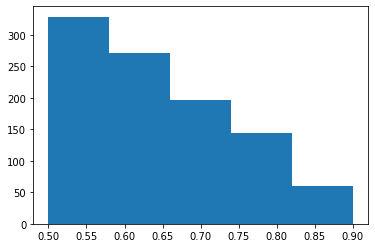

In [152]:
print(att_0.shape)
plt.hist(att_0[:,2], bins=5)
plt.show()

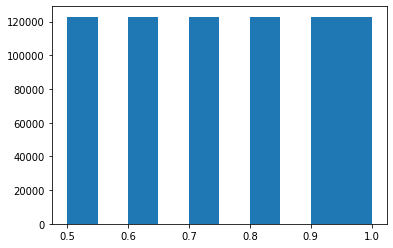

In [151]:
plt.hist(atts[:,2], bins=10)
plt.show()